In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

In [7]:
mu_e = (3.6 * 10 ** 4)/(10**9)
mu_h = (4.2 * 10 ** 4)/(10**9) 
r_inner = 0.455  # cm
r_outer = 2.615  # cm
eps_0 = 8.85 * 10 ** (-14) 
eps = 16 * eps_0
rho = 10**10  # cm^-3
q = 1.6 * 10 ** (-19)
V = 2360 # V

alpha = (q * rho) / (4 * eps)
beta = (V - (alpha * (r_outer**2 - r_inner**2)))/np.log(r_outer/r_inner)

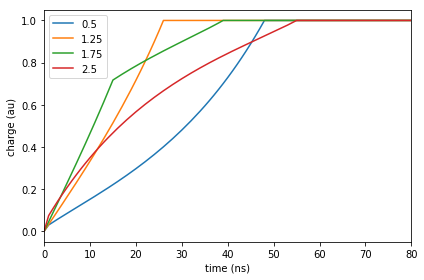

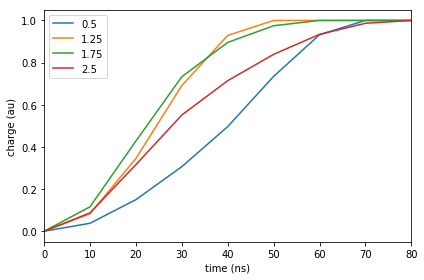

In [8]:
def siggen(r0):
    assert r0 > r_inner or r0 > r_outer
    time = np.arange(0, 200)
    q_e_vals = []
    q_h_vals = []
    t_e = -np.log((r_inner**2 + beta/(2*alpha))/(r0**2 + beta/(2*alpha)))/(4 * mu_e * alpha)
    t_h = np.log((r_outer**2 + beta/(2*alpha))/(r0**2 + beta/(2*alpha)))/(4 * mu_h * alpha)
    i = 0
    for t in time:
        if t < t_e:
            r_e = np.sqrt((r0**2 + beta/(2*alpha)) * np.exp(-4 * alpha * mu_e * t) - beta/(2*alpha))
            q_e = (alpha * (r0 ** 2 - r_e ** 2)) / V + (beta / V) * np.log(r0 / r_e)
            q_e_vals.append(q_e)
        else:
            q_e_vals.append(q_e_vals[i-1])
        if t < t_h:
            r_h = np.sqrt((r0 ** 2 + beta/(2*alpha)) * np.exp(4 * alpha * mu_e * t) - beta/(2*alpha))
            q_h = (alpha / V) * (r_h ** 2 - r0 ** 2) + (beta / V) * np.log(r_h / r0)        
            q_h_vals.append(q_h)
        else:
            q_h_vals.append(q_h_vals[i-1])
        i += 1
    q_e_vals = np.array(q_e_vals)
    q_h_vals = np.array(q_h_vals)
    
    q = q_e_vals + q_h_vals

    return time, q

time = np.arange(0, 200)
radius_values = [0.5, 1.25, 1.75 ,2.5]
radius_1 = radius_values[0]
radius_2 = radius_values[1]
radius_3 = radius_values[2]
radius_4 = radius_values[3]

time, q_1 = siggen(radius_1)
time, q_2 = siggen(radius_2)
time, q_3 = siggen(radius_3)
time, q_4 = siggen(radius_4)

q_1 = q_1 / np.max(q_1)
q_2 = q_2 / np.max(q_2)
q_3 = q_3 / np.max(q_3)
q_4 = q_4 / np.max(q_4)

plt.plot(time, q_1, label=str(radius_1))
plt.plot(time, q_2, label=str(radius_2))
plt.plot(time, q_3, label=str(radius_3))
plt.plot(time, q_4, label=str(radius_4))
plt.legend()
plt.xlim([0, 80])
plt.xlabel('time (ns)')
plt.ylabel('charge (au)')
plt.tight_layout()
plt.savefig('../figures/siggen.pdf')
plt.show()

# downsample
# convolve

q_1 = q_1[0::10]
q_2 = q_2[0::10]
q_3 = q_3[0::10]
q_4 = q_4[0::10]
time = time[0::10]

q_1 = np.convolve(q_1, np.ones((2,))/2, mode='full')[0:-1]
q_2 = np.convolve(q_2, np.ones((2,))/2, mode='full')[0:-1]
q_3 = np.convolve(q_3, np.ones((2,))/2, mode='full')[0:-1]
q_4 = np.convolve(q_4, np.ones((2,))/2, mode='full')[0:-1]
q_1 = np.convolve(q_1, np.ones((2,))/2, mode='full')[0:-1]
q_2 = np.convolve(q_2, np.ones((2,))/2, mode='full')[0:-1]
q_3 = np.convolve(q_3, np.ones((2,))/2, mode='full')[0:-1]
q_4 = np.convolve(q_4, np.ones((2,))/2, mode='full')[0:-1]

plt.plot(time, q_1, label=str(radius_1))
plt.plot(time, q_2, label=str(radius_2))
plt.plot(time, q_3, label=str(radius_3))
plt.plot(time, q_4, label=str(radius_4))
plt.legend()
plt.xlim([0, 80])
plt.xlabel('time (ns)')
plt.ylabel('charge (au)')
plt.tight_layout()
plt.savefig('../figures/siggen_preamp.pdf')
plt.show()